In [1]:
## -- Load packages -- ##
import numpy as np                     # Array package
import pandas as pd                    # Data-Frame package
import math                            # "Basic Advanced" maths operations
import matplotlib.pyplot as plt        # Advanced plot tool
from scipy import integrate, signal    # Signal processing tool

## Quaternions
First of all, we need to know what a quaternion is, what it represents and how we represent it. A quaternion, denoted as $\mathbf{q}$, is a formal mathematical object, serving as an extension of the complex numbers. Besides mathematical formalism and history (even though <a href = "https://en.wikipedia.org/wiki/William_Rowan_Hamilton#Quaternions">very interesting!</a>), such a representation is often used to get the orientation of a given body into three-dimensional space. A quaternion $\mathbf{q}$ is expressed as:

\begin{equation} \mathbf{q} = w + x\mathbf{i} + y\mathbf{j} + z\mathbf{k} \end{equation}

where $w$ is the scalar component, while $x\mathbf{i}$, $y\mathbf{j}$, and $z\mathbf{k}$ build up the vectorial one. Now, we need to define two quaternion operations, namely the quaternion *conjugate* and the quaternion *product*. 

### Quaternion conjugate
Let consider a quaternion $\mathbf{q} = \begin{bmatrix}w & x\mathbf{i} & y\mathbf{j} & z\mathbf{k} \end{bmatrix}$. Its conjugate, $\mathbf{q}^*$ is defined as:

<center>$\begin{equation} \mathbf{q}^* = \begin{bmatrix}w & -x\mathbf{i} & -y\mathbf{j} & -z\mathbf{k} \end{bmatrix} \end{equation}$</center>

### Quaternion product
Now, let consider two quaternions, $\mathbf{q}_1$ and  $\mathbf{q}_2$. The quaternion product ($x \otimes y$) is defined according to the **Hamilton product** as:
    
\begin{align} x \otimes y =  & w_1 w_2 - x_1 x_2 - y_1 y_2 - z_1 z_2\ + \\
                     + & (w_1 x_2 + x_1 w_2 + y_1 z_2 - z_1 y_2) \mathbf{i}\ + \\ 
                     + & (w_1 y_2 - x_1 z_2 + y_1 w_2 + z_1 x_2) \mathbf{j}\ + \\
                     + & (w_1 z_2 + x_1 y_2 - y_1 x_2 + z_1 w_2) \mathbf{k}  \end{align}
    
It must be noticed that the quaternion product is **not** commutative.

In [2]:
# Quaternion Conjugate
def quaternConj(q):
    w, x, y, z = q
    return np.array([w, -x, -y, -z], dtype = np.float64)

# Quaternion Product
def quaternProd(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    return np.array([w1*w2 - x1*x2 - y1*y2 - z1*z2,
                     w1*x2 + x1*w2 + y1*z2 - z1*y2,
                     w1*y2 - x1*z2 + y1*w2 + z1*x2,
                     w1*z2 + x1*y2 - y1*x2 + z1*w2])

# Take-Off Velocity method for h computation
def get_height(a_glob, sb, to, fs, plot):
    L = to - sb    # Length of the acceleration to be considered
    t = np.linspace(0, L/fs, num = L)    # Create the linspace time vector for the integration
    v = integrate.cumtrapz(a_glob[sb:to], t, initial=0)    # Perform the integration
    
    if plot == 1:
        plt.plot(t,v)
        plt.xlim([0,L/fs]), plt.title("Velocity from start bending to take-off"), plt.xlabel("Time (s)"), plt.ylabel("Velcity (m/s)")
    
    return( ( 0.5 * np.square(v[-1]) ) / g )

## Other representations
The advantage of quaternions are multiple. First of all, they are computationally cheap, indeed they are often used as the main representation in *on-board* IMUs. Secondly, they avoid singularity issues (e.g. <a href = "https://en.wikipedia.org/wiki/Gimbal_lock">gimbal lock</a>). However, they are not used in many human-related fields like biomechanics, since they do not allow a *user-friendly* representation of the rotations a body is performing. For this reason, other representations must  be used, often being *Euler angles*.

Fortunately, it is possible to switch from one representation to another relatively easily, as we can see in the following paragraphs. 
### Quaternions to Euler angles

Let consider a quaternion $\mathbf{q} = w + x\mathbf{i} + y\mathbf{j} + z\mathbf{k}$. It is possible to convert it into *Euler angles* according to the following relationship: 

\begin{align} \begin{bmatrix}
\phi \\ \theta \\ \psi
\end{bmatrix} =
\begin{bmatrix}
\mbox{atan2}  [ 2(w x + y z),1 - 2(x^2 + y^2) ] \\
\mbox{asin} [ 2(w y - z x) ] \\
\mbox{atan2}  [ 2(w z + x y),1 - 2(y^2 + z^2) ]
\end{bmatrix} \end{align}

where $\phi$, $\theta$, and $\psi$ are referred to as the **roll**, **pitch**, and **yaw** angle, respectively. Notice that this is a computer implementation of the conversion, hence the function ```atan2(x, y)``` is used. The reason beneath this choice is that the regular ```atan(x)``` function cannot distinguish the quadrant the arc belongs to (1<sup>st</sup> vs. 3<sup>rd</sup> or 2<sup>nd</sup> vs. 4<sup>th</sup>). The double argument helps the interpreter to understand it, avoiding ambiguities. You can find more information <a href = "https://en.wikipedia.org/wiki/Atan2#History_and_motivation">here</a>.

<p align = "center"><kbd><img width="300" src="./misc/rpy.svg"></kbd></p>

## Euler angles to Quaternions
To be written...

In [ ]:
# Quaternions to Euler Angles
def quatern2eul(q):
        N = q.shape[0]
        roll_x = np.zeros(N)
        pitch_y = np.zeros(N)
        yaw_z = np.zeros(N)
        
        for k in range(0, N):
            w, x, y, z = q[k,:]
            t0 = +2.0 * (w * x + y * z)
            t1 = +1.0 - 2.0 * (x * x + y * y)
            roll_x[k] = math.atan2(t0, t1)

            t2 = +2.0 * (w * y - z * x)
            t2 = +1.0 if t2 > +1.0 else t2
            t2 = -1.0 if t2 < -1.0 else t2
            pitch_y[k] = math.asin(t2)

            t3 = +2.0 * (w * z + x * y)
            t4 = +1.0 - 2.0 * (y * y + z * z)
            yaw_z[k] = math.atan2(t3, t4)
         
        return roll_x, pitch_y, yaw_z # [rad]

# Euler Angles to Quaternions
def eul2quatern(roll_x, pitch_y, yaw_z):
    N = roll_x.shape[0]
    q = np.zeros((N,4))
    
    for k in range(0,N):
        cy, sy = np.cos(yaw_z[k] * .5), np.sin(yaw_z[k] * .5)
        cp, sp = np.cos(pitch_y[k] * .5), np.sin(pitch_y[k] * .5)
        cr, sr = np.cos(roll_x[k] * .5), np.sin(roll_x[k] * .5)
        
        w = cr * cp * cy + sr * sp * sy
        x = sr * cp * cy - cr * sp * sy
        y = cr * sp * cy + sr * cp * sy
        z = cr * cp * sy - sr * sp * cy
        q[k,:] = w, x, y, z
    
    return q

At this point, we need to estimate the smartphone-IMU orientation in the three-dimensional space. To do so, we use the complementary filter proposed by <a href = https://www.x-io.co.uk/res/doc/madgwick_internal_report.pdf>Madgwick</a>. 

The idea behind a (very general!) complementary filter is to exploit the *best feature* of the accelerometer to correct for gyroscope inaccuracies and *viceversa*. We need to keep in mind that:

* The accelerometer has a high-frequency noise, but its measures remain stable with time;
* The gyroscope has a low-frequency noise, referred to as **drift**, but its measures are smoother over a short timespan. 

Hence, a complementary filter applies:

* A low-pass filter onto the accelerometer measures, *smoothing* the original signal;
* A high-pass filter onto the gyroscope measures, removing the drift-trending.

To give a brief overview, let consider only one axis. The angle between the MIMU axis and the respective global reference frame axis is $\theta$. The general angle at time $t$ is computed as: 

<center> $\theta[t] =  (1-\beta) \cdot (\theta[t-1] + \omega[t] \cdot dt) + \beta \cdot a[t]$ </center>

where $\omega[t]$ and $a[t]$ are the angular velocity and the acceleration measured by the gyroscope and the accelerometer along the considered axis at time $t$, respecitvely; $\theta[t-1]$ is the angle computed at the previous time instant; $dt$ is the sampling period; $\beta \in \begin{bmatrix} 0, 1 \end{bmatrix}$ is the filter coefficient. 

The first term of the previous equation is a sort of high-pass filter, whereas the secon term is a low-pass one. The choice of $\beta$ is critical. According to the equation above, its general purpose is to make us trust more one instruments above the other. The bigger $\beta$, the more we trust the gyroscope; on the contrary, the smaller $\beta$, the more we trust the accelerometer.

In [3]:
# --- Stupid Complementary Filter
def my_cf(acc_data, gyr_data, fs, b, mu):
    N = acc_data.shape[0]
    roll_x, pitch_y, yaw_z, angle_x, angle_y, angle_z = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
    b = .1
    dt = 1/fs
    
    for k in range(1,N):

        alpha_x = np.arctan2(acc_data[k,1], acc_data[k,2])
        alpha_y = np.arctan2(-acc_data[k,0],  np.sqrt( np.square(acc_data[k,1]) + np.square(acc_data[k,2]) ))

        angle_x[k] = 0.5 * ( gyr_data[k-1,0] + gyr_data[k,0] ) + angle_x[k-1]
        angle_y[k] = 0.5 * ( gyr_data[k-1,1] + gyr_data[k,1] ) + angle_y[k-1]
        angle_z[k] = 0.5 * ( gyr_data[k-1,2] + gyr_data[k,2] ) + angle_z[k-1]

        roll_x[k] = (1 - b) * ( angle_x[k-1] + gyr_data[k,0] * dt ) + b * alpha_x
        pitch_y[k] = (1 - b) * ( angle_y[k-1] + gyr_data[k,1] * dt ) + b * alpha_y
        yaw_z[k] = angle_z[k] 
        
    if mu == 'deg':
        return roll_x, pitch_y, yaw_z  
    elif mu == 'rad':
        return roll_x*np.pi/180, pitch_y*np.pi/180, yaw_z*np.pi/180 
    else:
        print('You need to select the RPY output type (mu).\nChoose either "rad" or "deg"' )

In [4]:
def align_to_WRF(q, acc):
    N = acc.shape[0]
    a_q, q_star, q_glob = np.zeros((N,4)), np.zeros((N,4)), np.zeros((N,4))
    a_q[:,1:] = acc

    for t in range(0,N):
        q_star[t] = quaternConj(q[t])
        q_temp = quaternProd(q[t], a_q[t])
        q_glob[t] = quaternProd(q_temp, q_star[t])

    return q_glob[:,2] - np.mean(q_glob[0:100,2])

In [5]:
## -- Global Variables
fs = 128
beta = .02
g = 9.81
sb_sp, to_sp = 172, 267    # Start Bending and Take-Off time instant for smartphone
sb_fp, to_fp = 161, 274    # Start Bending and Take-Off time instant for forceplatform

0.17 0.23


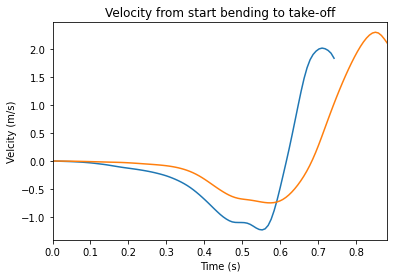

In [6]:
## -- Load the jump -- ##
x = pd.read_csv('./data/cmj_smartphone.csv')
xx = pd.read_csv('./data/cmj_forceplate.csv')
a_fp = pd.DataFrame.to_numpy(xx['ay'])

## -- Convert accelerometer and gyroscope to Numpy arrays
acc_data = pd.DataFrame.to_numpy(x[['ax','ay','az']])
gyr_data = pd.DataFrame.to_numpy(x[['gx','gy','gz']])

r,p,y = my_cf(acc_data, gyr_data, fs, beta, 'rad')
q = eul2quatern(r,p,y)
a_glob = align_to_WRF(q, acc_data)
np.savetxt("./data/a_glob.csv", a_glob, delimiter = ",")

h_sp = round(get_height(a_glob, sb_sp, to_sp, fs, 1), 2)
h_fp = round(get_height(a_fp, sb_fp, to_fp, fs, 1), 2)
print(h_sp , h_fp)

(4.52413198750996, 1.988459840225948, 1.1595308515403016)

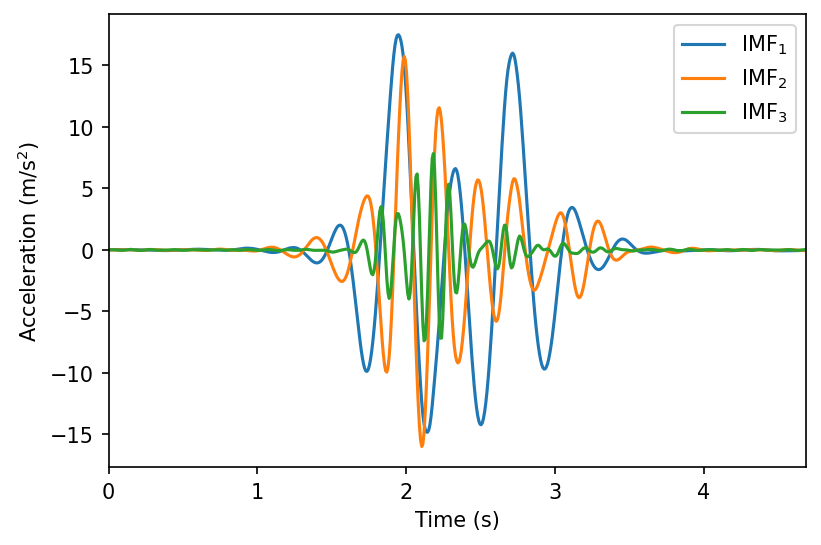

In [7]:
## --- Apply VMD --- ##
from vmdpy import VMD
## --- VMD Parameters --- ##
alpha = 2000       # Low Bandwidth Constrain  
tau = 0           # Noise-tolerance (no strict fidelity enforcement)  
K = 3              # 3 modes  
DC = 0             # DC part imposed  
init = 0           # Initialize omegas uniformly  
tol = 1e-20        # Tolerance parameter

time = np.linspace(0, a_glob.shape[0]/fs, num = a_glob.shape[0])

## --- Run VMD on smartphone aligned acceleration trace --- ## 
u, u_hat, omega = VMD(a_glob, alpha, tau, K, DC, init, tol)  
IMFs = np.transpose(u)

fig = plt.figure(1)
fig.dpi = 150
plt.plot(time, IMFs)
plt.xlabel('Time (s)'), plt.ylabel('Acceleration (m/s$^2$)'), plt.xlim([time[0], time[-1]])
plt.legend(['IMF$_1$', 'IMF$_2$', 'IMF$_3$'])

f3, f2, f1 = omega[-1] * ( fs / 2 )    # Convert the central-frequencies to their "actual value"
f1, f2, f3

Here we have the coefficients of the Multiple Linear Regression obtained for the ISB2021 abstract:

|                     | Constant ($b_0$)   | $\hat{h}$ ($b_1$) | B ($b_2$) | T ($b_3$) | S ($b_4$) | I ($b_5$) | $f_3$ ($b_6$) | R<sub>PN</sub> ($b_7$) |
| ------------------- | ------------------ | ----------------- | --------- | --------- | --------- | --------- | ------------- | ---------------------- |
| MLR<sub>CMJ</sub>   | .385***            | .101$^§$          | -.004**   | -.005***  | -.004**   | -         | -.08***       | -                      |
| MLR<sub>SJ</sub>    | .161***            | .31***            | -         | -         | -.009***  | .005***   | -             | .034***                |

All we need to do is to store the coefficients associated with the kind of jump we want to correct for (in this case a CMJ). 

In [8]:
## ---- Regression coefficients ---- ##
# Legend:
# b0 = constant; b1 = h_hat; b2 = biceps; b3 = triceps; b4 = scapula; b5 = f3
b0, b1, b2, b3, b4, b5, b6, b7  = .385, .101, -.004, -.005, -.004, 0, -.08, 0

## ---- Subject skinfolds (mm) ---- ##
B, T, S, I = 2.3, 7, 10, 9

h_mlr = round(b0 + b1 * h_sp + b2 * B + b3 * T + b4 * S + b5 * I + b6 * f3, 2)
h_mlr, h_fp, h_sp

(0.23, 0.23, 0.17)